In [21]:
import scipy.stats as stats

In [2]:
#load data
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [3]:
# separate quantitative features and qualitative features
types = train_df.dtypes.values
quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

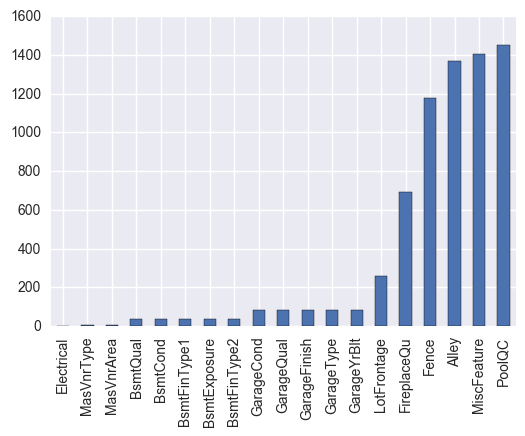

In [4]:
# visualize the amount of missing data
missing = train_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

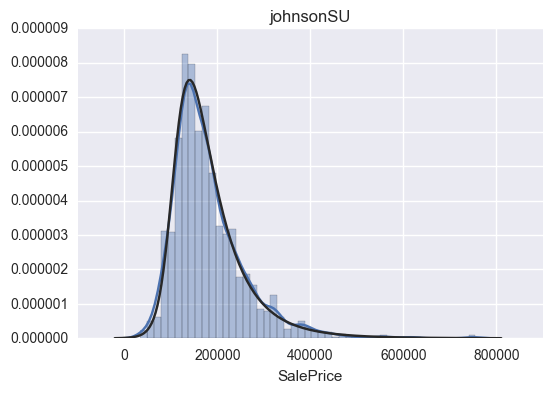

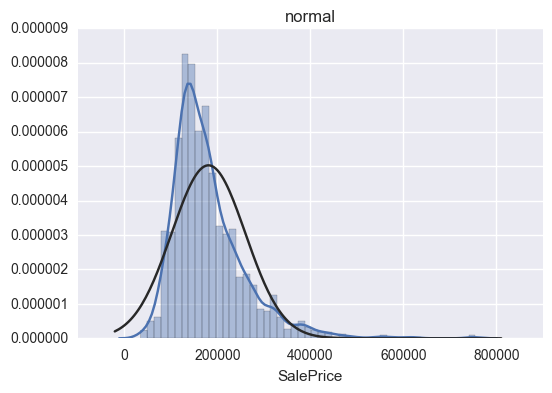

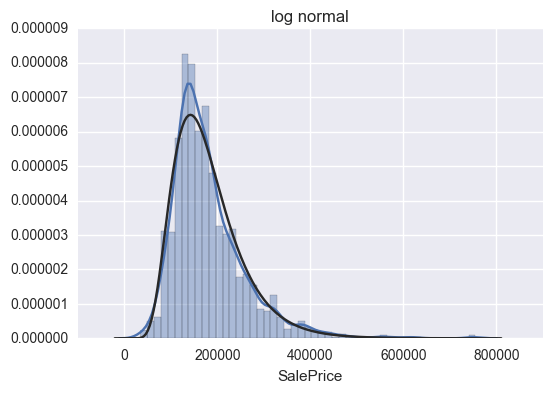

In [5]:
# fitting distributions to SalePrice
import scipy.stats as st
sp = train_df['SalePrice']

plt.figure(1)
plt.title('johnsonSU')
sns.distplot(sp, fit=st.johnsonsu)

plt.figure(2)
plt.title('normal')
sns.distplot(sp, fit=st.norm)

plt.figure(3)
plt.title('log normal')
sns.distplot(sp, fit=st.lognorm)


In [6]:
# test normality of quantitative features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_df[quantitative])
normal = normal.apply(test_normality)
print normal

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool


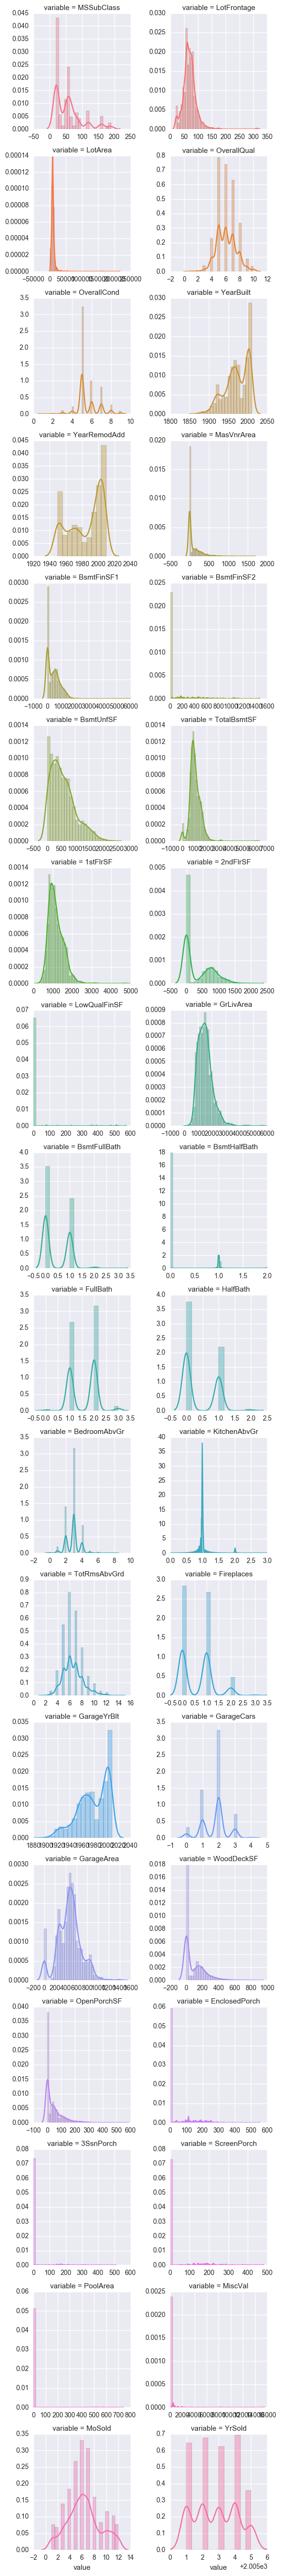

In [7]:
f = pd.melt(train_df, value_vars=quantitative)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, hue='variable')
g = g.map(sns.distplot, 'value')

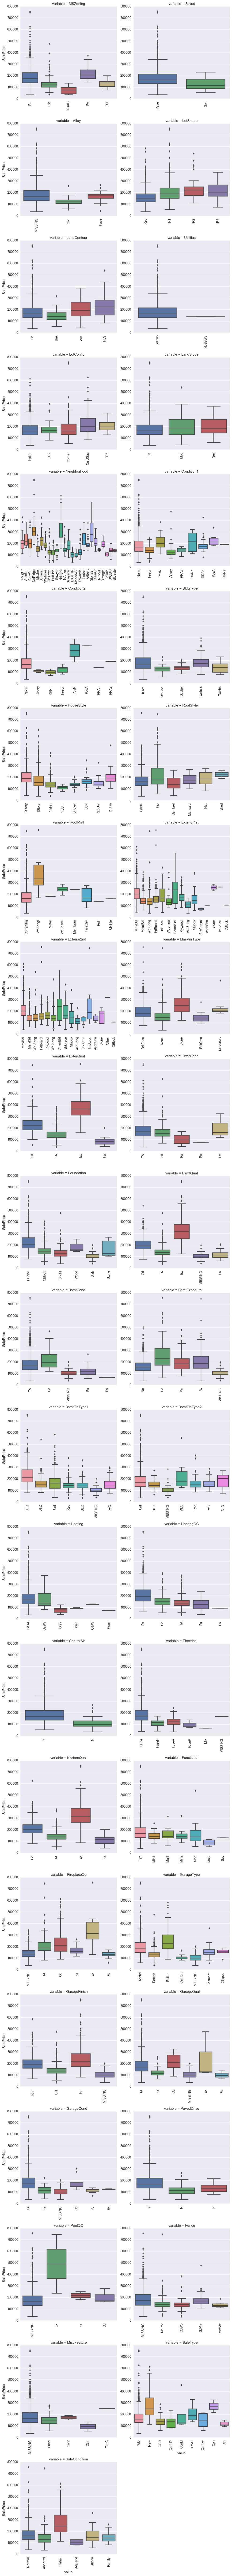

In [8]:
for c in qualitative:
    train_df[c] = train_df[c].astype('category')
    if train_df[c].isnull().any():
        train_df[c] = train_df[c].cat.add_categories(['MISSING'])
        train_df[c] = train_df[c].fillna('MISSING')
        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)
    
f = pd.melt(train_df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value', 'SalePrice')

In [9]:
f

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
5,143000,MSZoning,RL
6,307000,MSZoning,RL
7,200000,MSZoning,RL
8,129900,MSZoning,RM
9,118000,MSZoning,RL


In [10]:
a = np.random.normal(2, 3, 10)
b = np.random.normal(10, 3 ,10)

In [11]:
stats.f_oneway(a, b)

F_onewayResult(statistic=78.829256314704594, pvalue=5.3887749001157989e-08)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

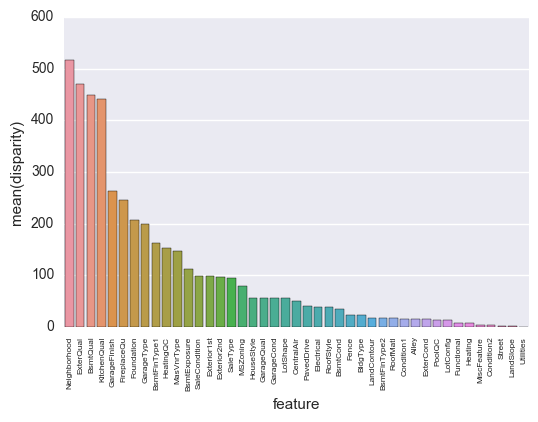

In [12]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train_df)
a['disparity'] = np.log(1.0/a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
plt.xticks(rotation=90, fontsize=6)

In [13]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train_df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [14]:
train_df[['SaleCondition', 'SaleCondition_E']]

,SaleCondition,SaleCondition_E
0,Normal,5.0
1,Normal,5.0
2,Normal,5.0
3,Abnorml,2.0
4,Normal,5.0
5,Normal,5.0
6,Normal,5.0
7,Normal,5.0
8,Abnorml,2.0
9,Normal,5.0


In [15]:
from sklearn.manifold import TSNE
features = quantitative + qual_encoded
model = TSNE(random_state=0, perplexity=30)
X = train_df[features].fillna(0.).values
tsne = model.fit_transform(X)

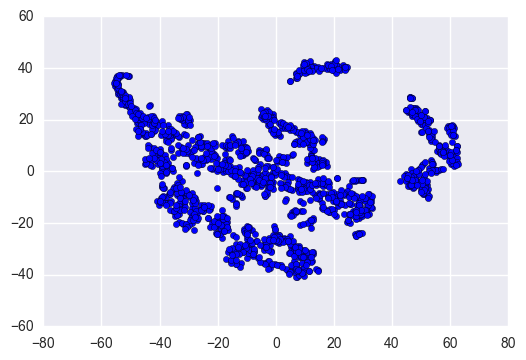

In [16]:
from sklearn.manifold import TSNE
features = quantitative + qual_encoded
model = TSNE(random_state=0, perplexity=30)
X = train_df[features].fillna(0.).values
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1])

[ 0.17539355  0.05074239]
0.226135938251


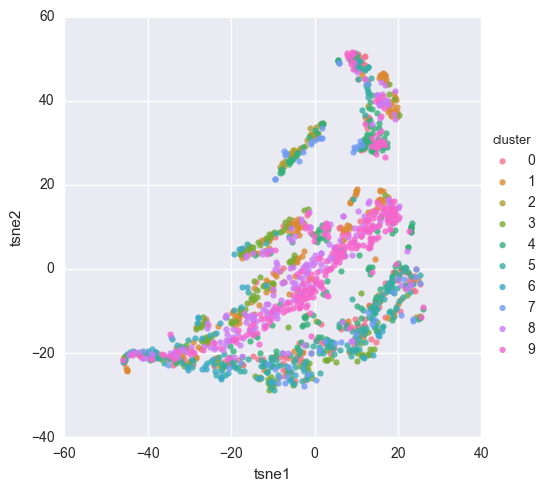

In [17]:
from sklearn.manifold import TSNE
features = quantitative + qual_encoded
model = TSNE(random_state=1, perplexity=50)
X = train_df[features].fillna(0.).values
tsne = model.fit_transform(X)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=2)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=10)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print pca.explained_variance_ratio_
print np.sum(pca.explained_variance_ratio_)

In [18]:
y = train_df['SalePrice'].values

In [23]:
import scipy.stats

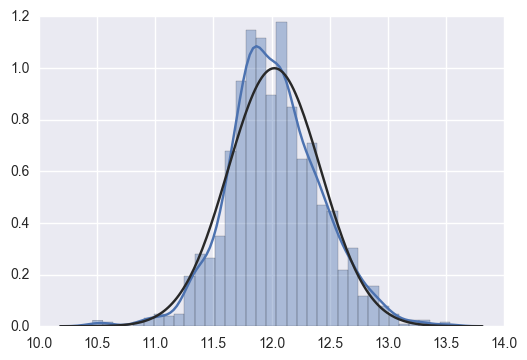

In [24]:
sns.distplot(np.log(y), fit=scipy.stats.norm)

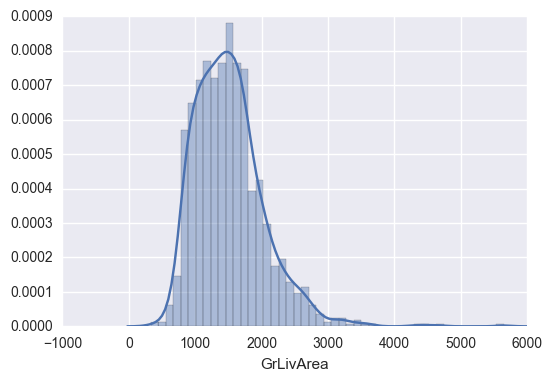

In [25]:
sns.distplot(train_df['GrLivArea'])

(array([[  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0

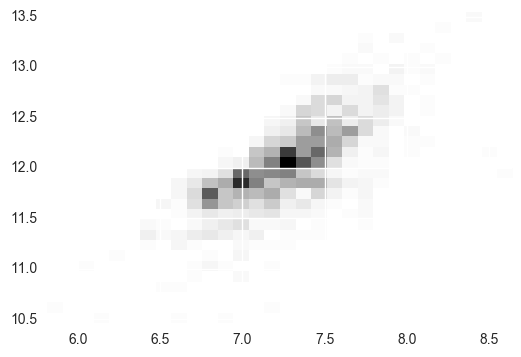

In [26]:
plt.hist2d(np.log(train_df['GrLivArea']), np.log(train_df['SalePrice']), bins=[30, 30])

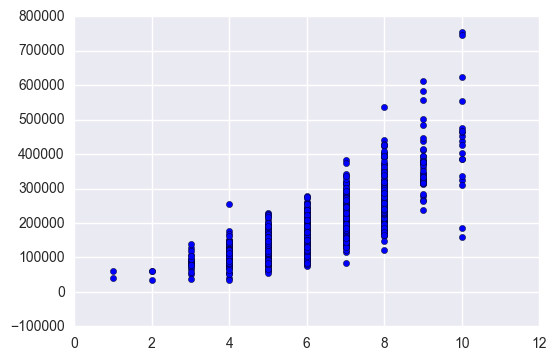

In [27]:
plt.scatter((train_df['OverallQual']), (train_df['SalePrice']))

In [28]:
mean_OQ = train_df[['OverallQual','SalePrice']].groupby(by='OverallQual').mean()
print mean_OQ

             SalePrice
OverallQual           
1                50150
2                51770
3                87473
4               108420
5               133523
6               161603
7               207716
8               274735
9               367513
10              438588


(0, 10)

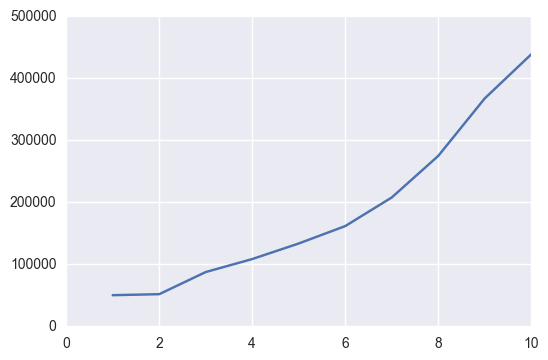

In [29]:
plt.plot(mean_OQ.index, (mean_OQ['SalePrice']))
plt.ylim((0, 500000))
plt.xlim((0, 10))

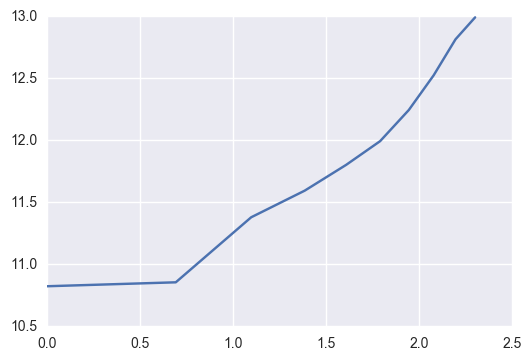

In [30]:
plt.plot(np.log(mean_OQ.index), np.log(mean_OQ['SalePrice']))
#plt.ylim((0, 500000))
#plt.xlim((0, 10))

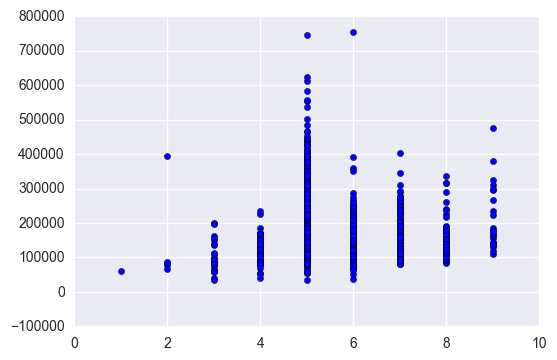

In [31]:
plt.scatter(train_df['OverallCond'], train_df['SalePrice'])

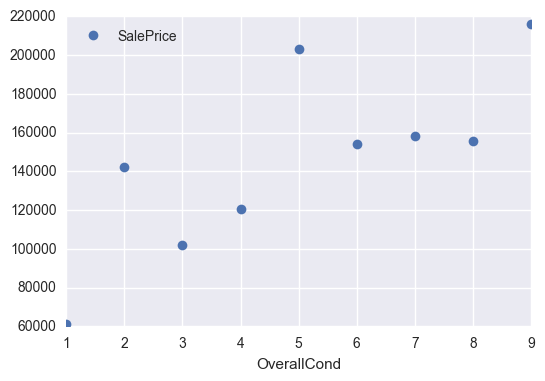

In [32]:
var = 'OverallCond'
var2 = var + '2'
train_df[var2] = train_df[var]**2
train_df[[var, 'SalePrice']].groupby(by=var).mean().plot(marker='o', lw=0)

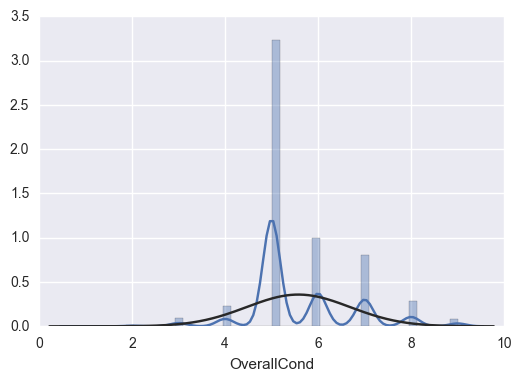

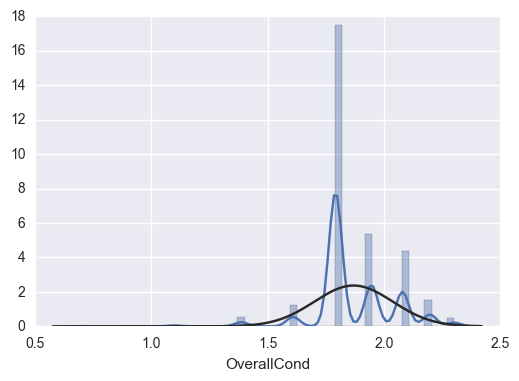

In [33]:
var = 'OverallCond'
fig = plt.figure(1)
sns.distplot(train_df[var].dropna(), fit=stats.norm)
fig = plt.figure(2)
sns.distplot(np.log1p(train_df[var].dropna()), fit=stats.norm)

In [34]:
train_df['2ndFlrSF'].isnull().sum()

0

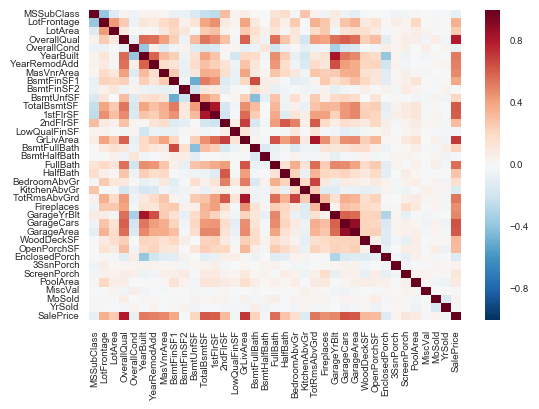

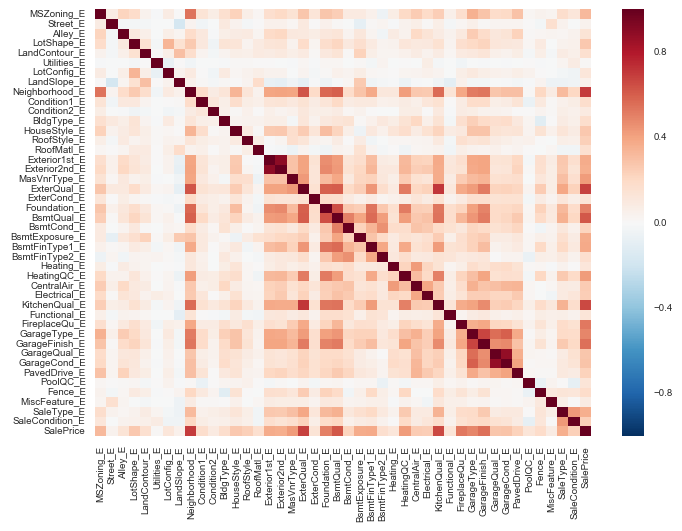

In [35]:
plt.figure(1)
corr  = train_df[quantitative + ['SalePrice']].corr()
sns.set(font_scale=0.7)
sns.heatmap(corr)

plt.figure(2)
corr  = train_df[qual_encoded + ['SalePrice']].corr()
sns.set(font_scale=0.7)
sns.heatmap(corr)

In [36]:
corr

,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,...,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,SalePrice
MSZoning_E,1.000000,0.084606,0.221947,0.187166,0.045657,-0.009400,0.079673,0.006208,0.542873,0.135420,...,0.285038,0.184995,0.195544,0.289688,0.022729,0.045851,0.027302,0.172691,0.121091,0.324610
Street_E,0.084606,1.000000,-0.015720,-0.023314,-0.016663,-0.001682,-0.000463,-0.179360,0.038074,-0.035005,...,0.015529,0.024246,0.023535,0.024521,0.004067,-0.029094,0.157405,0.042360,-0.000132,0.041036
Alley_E,0.221947,-0.015720,1.000000,0.094405,0.061934,-0.006407,0.069300,0.030096,0.180573,0.108693,...,0.182637,0.115637,0.137773,0.229766,0.015492,0.018003,0.026850,0.016168,0.045481,0.139868
LotShape_E,0.187166,-0.023314,0.094405,1.000000,0.150626,-0.022853,0.341733,0.155286,0.262695,0.104375,...,0.224514,0.117353,0.110839,0.103826,0.018008,0.089342,-0.005278,0.042979,0.048021,0.265699
LandContour_E,0.045657,-0.016663,0.061934,0.150626,1.000000,0.002910,0.067484,0.300280,0.175169,0.035800,...,0.125834,0.058197,0.043503,0.072090,-0.017864,0.067741,-0.019098,0.078428,0.058891,0.158437
Utilities_E,-0.009400,-0.001682,-0.006407,-0.022853,0.002910,1.000000,-0.074630,0.005909,-0.036786,-0.005573,...,-0.008338,-0.006836,-0.007939,-0.007586,0.001657,-0.011857,-0.004971,0.028270,0.083578,0.014314
LotConfig_E,0.079673,-0.000463,0.069300,0.341733,0.067484,-0.074630,1.000000,0.046764,0.089955,0.007778,...,0.068840,0.046991,0.039756,0.063821,0.039226,0.005411,-0.004453,-0.026608,-0.040893,0.122882
LandSlope_E,0.006208,-0.179360,0.030096,0.155286,0.300280,0.005909,0.046764,1.000000,0.048795,0.013458,...,-0.025383,-0.002835,-0.015261,-0.024538,-0.014289,0.034243,-0.048824,-0.047691,-0.046610,0.051152
Neighborhood_E,0.542873,0.038074,0.180573,0.262695,0.175169,-0.036786,0.089955,0.048795,1.000000,0.182677,...,0.531526,0.274682,0.302510,0.301034,0.013144,0.209441,0.084248,0.316106,0.205762,0.696882
Condition1_E,0.135420,-0.035005,0.108693,0.104375,0.035800,-0.005573,0.007778,0.013458,0.182677,1.000000,...,0.179886,0.063355,0.085667,0.140360,-0.064137,0.101507,0.011820,0.050878,0.076487,0.172398


In [37]:
import sklearn.linear_model as linear_model

def error_log(actual, pred):
    actual = np.log(actual)
    pred = np.log(pred)
    return np.sqrt(np.sum(np.square(actual-pred))/len(actual))

def error(actual, pred):
    return np.sqrt(np.sum(np.square(actual-pred))/len(actual))

features = quantitative + qual_encoded
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train_df[features].fillna(0.).values
Y = train_df['SalePrice'].values
lasso.fit(X, Y)

Y_pred = lasso.predict(X)
Y_pred_nz = np.maximum(1, Y_pred)
print error_log(Y, Y_pred_nz)
print error(Y, Y_pred)

0.317926363325
31210.8489952


In [38]:
lasso.alpha_

31.361807717061552

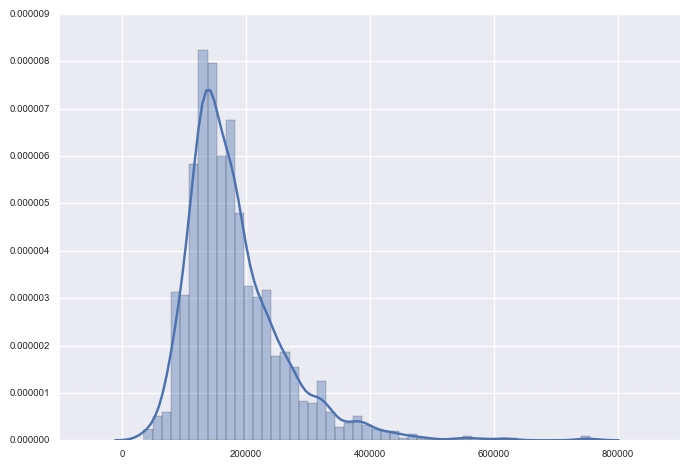

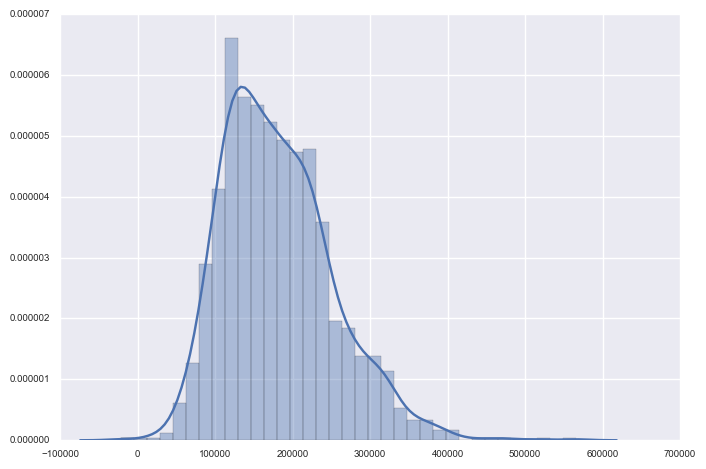

In [39]:
plt.figure(1)
sns.distplot(Y)

plt.figure(2)
sns.distplot(Y_pred)

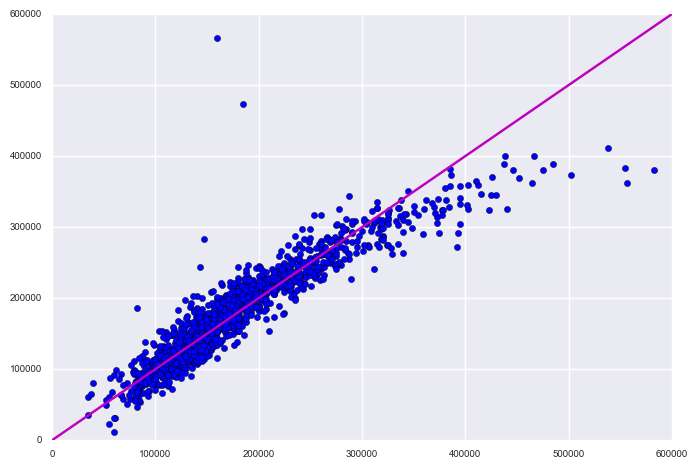

In [40]:
plt.scatter(Y, Y_pred)
plt.xlim(0, 600000)
plt.ylim(0, 600000)
x = np.arange(0, 600000)
plt.plot(x, x, color='m')

(array([[  1.,   0.,   2.,   2.,   4.,   2.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   2.,   3.,  14.,  12.,   5.,   0.,   0.,   0.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   2.,  11.,  42.,  29.,  11.,   4.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   2.,  22.,  77.,  86.,  34.,   8.,   2.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1.,  15.,  87.,  96.,  53.,  15.,
           4.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0

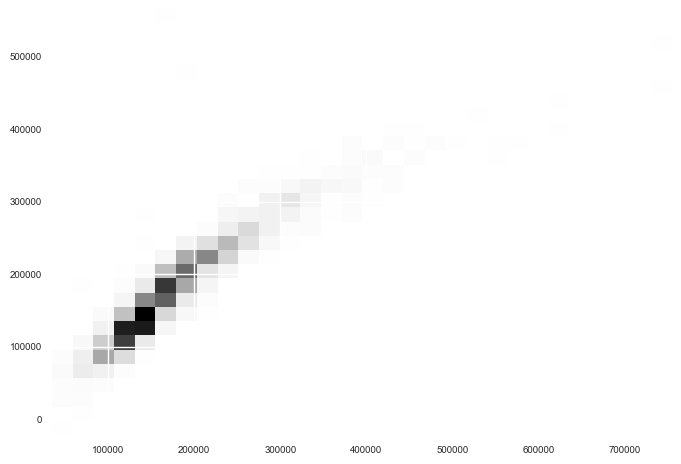

In [41]:
plt.hist2d(Y, Y_pred, bins=(30., 30))

In [42]:
x = 0.4 * np.ones(5)

In [43]:
np.log(0.9)

-0.10536051565782628

In [44]:
26*np.log(26)

84.710509988558542

In [45]:
a = np.array([1, 2, 3, 4, 5, 6])

In [46]:
a.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
a.reshape((2, 3)).reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [48]:
a

array([1, 2, 3, 4, 5, 6])

In [49]:
b = np.array([1, 3])

In [50]:
c = np.array([10, 11])

In [51]:
np.hstack((a, b, c))

array([ 1,  2,  3,  4,  5,  6,  1,  3, 10, 11])